In [1]:
# f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

# Определить корни

# Найти интервалы, на которых функция возрастает

# Найти интервалы, на которых функция убывает

# Построить график

# Вычислить вершину

# Определить промежутки, на котором f > 0

# Определить промежутки, на котором f < 0

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a, b, c, d, e = -1, -18, 5, 10, -30
limit = 10
step = 0.01
step_acr = 0.0000001
line_style = '-'
color = 'b'
direct_up = True

In [4]:
def switch_line():
    global line_style
    if line_style == '-':
        line_style = "--"
    else:
        line_style = "-"
    return line_style

In [5]:
def switch_color():
    global color
    if color == "b":
        color = "r"
    else:
        color = "b"
    return color

In [6]:
def func(x):
    f = a * x ** 4 * np.sin(np.cos(x)) + b * x ** 3 + c * x ** 2 + d * x + e
    return f

In [7]:
x = np.arange(-limit, limit + step, step)

In [8]:
x_change = [(-limit, 'limit')]

In [9]:
for i in range(len(x) - 1):
    if (func(x[i]) > 0 and func(x[i + 1]) < 0) or (func(x[i]) < 0 and func(x[i + 1]) > 0):
        x_a = np.arange(x[i], x[i+1], 0.0000001)
        for j in range(len(x_a) - 1):
            if (func(x_a[j]) > 0 and func(x_a[j + 1]) < 0) or (func(x_a[j]) < 0 and func(x_a[j + 1]) > 0):
                x_change.append((x_a[j] if abs(0 - x_a[j]) < abs(0 - x_a[j+1]) else x_a[j+1], 'zero'))
    if direct_up:
        if func(x[i]) > func(x[i + 1]):
            x_a = np.arange(x[i], x[i + 1], 0.0000001)
            for j in range(len(x_a) - 1):
                if func(x_a[j]) > func(x_a[j + 1]):
                    x_change.append((x_a[j], 'direct'))
                    direct_up = False
                    break
    else:
        if func(x[i]) < func(x[i + 1]):
            x_a = np.arange(x[i], x[i + 1], 0.0000001)
            for j in range(len(x_a) - 1):
                if func(x_a[j]) < func(x_a[j + 1]):
                    x_change.append((x_a[j], 'direct'))
                    direct_up = True
                    break

In [10]:
x_change.append((limit, 'limit'))

[(-10, 'limit'), (-10.0, 'direct'), (-1.253318099996285, 'zero'), (-0.3500000000002057, 'direct'), (0.523979699997681, 'direct'), (7.689999999999621, 'direct'), (8.90212389998669, 'direct'), (10, 'limit')]


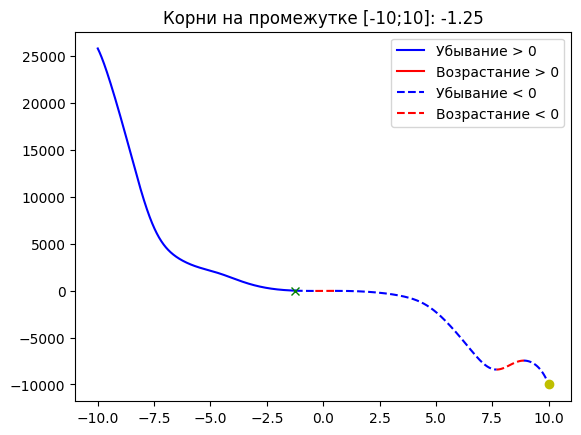

In [11]:
print(x_change)
for i in range(len(x_change) - 1):
    cur_x = np.arange(x_change[i][0], x_change[i + 1][0] + step, step)
    if x_change[i][1] == 'zero':
        plt.rcParams['lines.linestyle'] = switch_line()
        plt.plot(cur_x, func(cur_x), color)
    else:
        plt.plot(cur_x, func(cur_x), switch_color())

min_y = min(func(x))
min_x = -limit
for x in x_change:
    if x[1] in ['direct','limit']:
        if abs(func(x[0]) - min_y) < abs(min_x - min_y):
            min_x = x[0]
            
roots = []
for x in x_change:
    if x[1] == 'zero':
        roots.append(str(round(x[0], 2)))
        plt.plot(x[0], func(x[0]), 'gx')

plt.rcParams['lines.linestyle'] = '-'
plt.plot(0, 0, 'b', label='Убывание > 0')
plt.plot(0, 0, 'r', label='Возрастание > 0')
plt.rcParams['lines.linestyle'] = '--'
plt.plot(0, 0, 'b', label='Убывание < 0')
plt.plot(0, 0, 'r', label='Возрастание < 0')
plt.title(f'Корни на промежутке [{-limit};{limit}]: {", ".join(roots)}')
plt.legend()

plt.plot(min_x, min_y, 'yo', label=f'Экстремум функции на промежутке [{-limit};{limit}]: ({round(min_x, 2)}, {round(min_y, 2)})')

plt.show()